In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [ ]:
code = '035720' # 카카오 종목코드
page = 7500 # 크롤 희망 페이지 (페이지당 20개 댓글)

date_list = [] # 날짜
comment_list = [] # 댓글
view_list = [] # 조회수
good_list = [] # 좋아요
bad_list = [] # 싫어요
for i in range(1,page+1):
    url = f'https://finance.naver.com/item/board.naver?code={code}&page={i}'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 Edg/100.0.1185.50'}
    res = requests.get(url, headers = headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    
    for j in range(20):
        root = bs.find('div',{'class':'section inner_sub'}).find_all('tr',{'onmouseover':'mouseOver(this)'})[j].text.split('\n')
        
        date_list.append(root[1].split()[0].replace('.','-'))
        if len(root) == 14: # 답글
            comment_list.append('답글:'+root[4])
            view_list.append(root[10])
            good_list.append(root[11])
            bad_list.append(root[12])          
        elif len(root) == 13: # 기본
            comment_list.append(root[3])
            view_list.append(root[9])
            good_list.append(root[10])
            bad_list.append(root[11])
        else: # 에러
            comment_list.append('error')
            view_list.append(0)
            good_list.append(0)
            bad_list.append(0)       
    
    if i % 100 == 0:
        print(f'{i}페이지 크롤링 완료')
    

100페이지 크롤링 완료
200페이지 크롤링 완료
300페이지 크롤링 완료
400페이지 크롤링 완료
500페이지 크롤링 완료
600페이지 크롤링 완료
700페이지 크롤링 완료
800페이지 크롤링 완료
900페이지 크롤링 완료
1000페이지 크롤링 완료


In [27]:
df = pd.DataFrame()
df['날짜'] = date_list
df['댓글'] = comment_list
df['조회수'] = view_list
df['좋아요'] = good_list
df['싫어요'] = bad_list
df.head()

,날짜,댓글,조회수,좋아요,싫어요
0,2022-04-29,하방 경직성,8,1,0
1,2022-04-29,15만간다고 입방정떨때부터 알아봤다..,8,1,0
2,2022-04-29,역시 개 지 랄은 개카오..,25,2,0
3,2022-04-29,대폭등,27,1,1
4,2022-04-29,개잡주,14,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

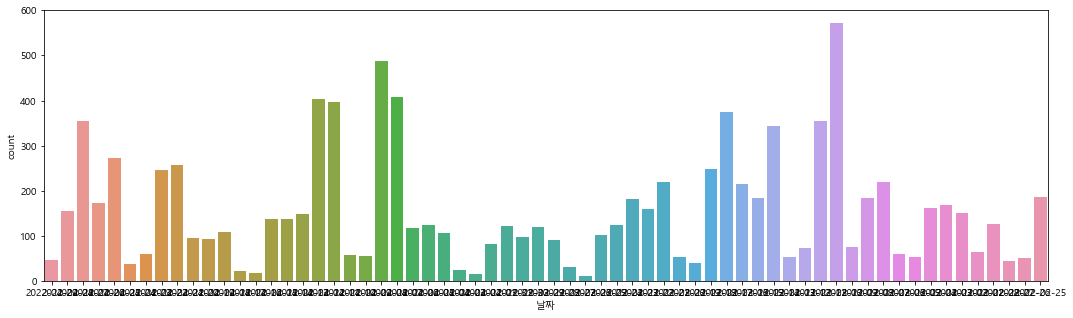

In [31]:
plt.figure(figsize=(18,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['날짜'])
plt.show

In [117]:
df.to_csv("./네이버종토방.csv", index=False, encoding='utf-8-sig')

In [118]:
df.to_csv("./네이버종토방1.csv", index=False)

In [119]:
df.to_csv("./네이버종토방2.csv", index=False,encoding='cp949')

In [120]:
df.to_csv("./네이버종토방3.csv", index=False, encoding='utf-8')